In [21]:
import nltk 
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import PorsterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from datetime import datetime

In [35]:
data1=pd.read_csv('./dfhotelsbcnwithdescrmay.csv')
data2=pd.read_csv('./dfhotelsbcnwithdescrjune.csv')
data3=pd.read_csv('./dfhotelsvalwithdescrmay.csv')
data4=pd.read_csv('./dfhotelsvalwithdescrjune.csv')
combined_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
print(combined_data)

           City              Date Period  \
0     Barcelona  2025-05-21 : 2025-05-25   
1     Barcelona  2025-05-21 : 2025-05-25   
2     Barcelona  2025-05-21 : 2025-05-25   
3     Barcelona  2025-05-21 : 2025-05-25   
4     Barcelona  2025-05-21 : 2025-05-25   
...         ...                      ...   
3875   Valencia  2025-06-04 : 2025-06-08   
3876   Valencia  2025-06-04 : 2025-06-08   
3877   Valencia  2025-06-04 : 2025-06-08   
3878   Valencia  2025-06-04 : 2025-06-08   
3879   Valencia  2025-06-04 : 2025-06-08   

                                               Hotel  Prices  Ratings  \
0                            Be Mate Paseo de Gracia  1443.0      8.9   
1                                 Hotel La Pau 4 Sup  2568.0      9.6   
2          Four Points by Sheraton Barcelona Airport   531.0      8.7   
3                                    Tembo Barcelona  1707.0      8.8   
4             Axel TWO Barcelona 4 Sup - Adults Only   976.0      8.3   
...                              

### Data Cleaning & Preprocessing

In [23]:
# Count the number of duplicates
num_duplicates = combined_data.shape[0] - combined_data.drop_duplicates().shape[0]

print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [24]:
combined_data['Prices'] = pd.to_numeric(combined_data['Prices'], errors='coerce')
combined_data['Ratings'] = pd.to_numeric(combined_data['Ratings'], errors='coerce')

Inpute missing values based on hotel rating and price

In [25]:
combined_data['Ratings'] = combined_data['Ratings'].fillna(combined_data['Ratings'].median())


In [26]:
# Count total missing values in each column
missing_counts = combined_data.isna().sum()
print(missing_counts)

City           0
Date Period    0
Hotel          0
Prices         0
Ratings        0
Description    0
dtype: int64


In [29]:
# Summary statistics for Prices and Ratings
print(combined_data[['Prices', 'Ratings']].describe())

# Group by city and date
city_prices = combined_data.groupby(['City', 'Date Period'])['Prices'].mean().reset_index()


             Prices      Ratings
count   3880.000000  3880.000000
mean    1332.909794     8.253789
std     1204.417659     0.977178
min      156.000000     1.000000
25%      684.000000     8.000000
50%     1019.000000     8.400000
75%     1496.500000     8.800000
max    17335.000000    10.000000


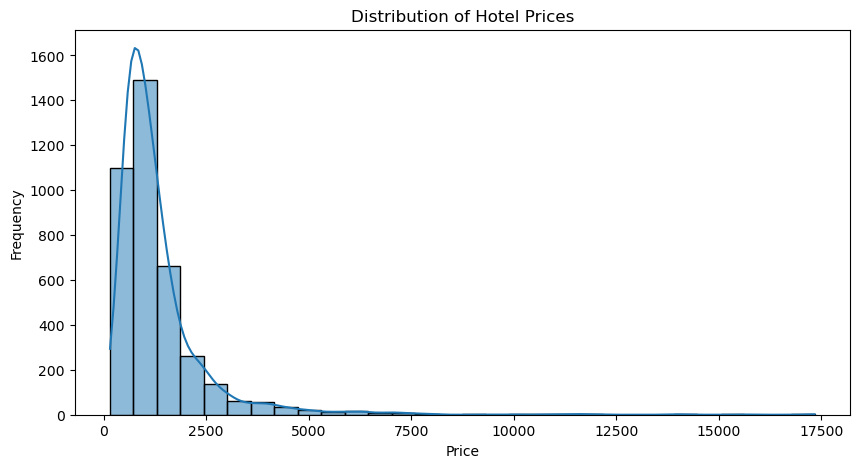

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(combined_data['Prices'], bins=30, kde=True)
plt.title('Distribution of Hotel Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
nltk.download('stopwords')

porter=SnowballStemmer("english") 
lmtzr = WordNetLemmatizer()  

STOP_WORDS = set(stopwords.words('english'))

In [ ]:
def preprocess_lower(text):
    """
    Preprocess text by:
       - Converting to lowercase.
       - Removing punctuation.
       - Tokenizing.
       - Removing stopwords.
    
    Returns:
        List[str]: A list of tokens.
    """
    # Lowercase the text
    text_lower = text.lower()

    # Remove punctuation (everything except word characters and whitespace)
    text_no_punct = re.sub(r'[^\w\s]', '', text_lower)

    # Tokenize the cleaned text.
    tokens = word_tokenize(text_no_punct) #divide el texto en palabras individuales

    # Filter out stopwords.
    filtered_tokens = [token for token in tokens if token not in STOP_WORDS]

    return " ".join(filtered_tokens)


def preprocess_stem(text):
    """
    Preprocess text by performing all steps in preprocess_lower() and then applying stemming.
    
    Returns:
        List[str]: A list of stemmed tokens.
    """
    # Get the cleaned lowercased and stopwords-removed tokens.
    joined_tokens = preprocess_lower(text)
    
    tokens=word_tokenize(joined_tokens)

    # Initialize the Porter Stemmer.
    ps = PorterStemmer()

    # Stem each token.
    stemmed_tokens = [ps.stem(token) for token in tokens]

    return " ".join(stemmed_tokens)

In [ ]:
# Initialize a list to store the processed results
processed_descriptions = []

# Loop through the raw descriptions in the `descriptions` list
for desc in descriptions:
    raw_description = desc["Raw Description"] if isinstance(desc, dict) else desc

    if raw_description != "Descripción no encontrada":
        # Apply lowercasing, punctuation removal, and stopword removal
        preprocessed_lower = preprocess_lower(raw_description)

        # Apply stemming
        preprocessed_stem = preprocess_stem(preprocessed_lower)

        # Store the processed results in a dictionary
        processed_descriptions.append({
            "Raw Description": raw_description,
            "Processed (Lowercase, No Stopwords)": preprocessed_lower,
            "Processed (Stemming)": preprocessed_stem
        })
    else:
        # Handle missing descriptions
        processed_descriptions.append({
            "Raw Description": raw_description,
            "Processed (Lowercase, No Stopwords)": "No processing - No description available",
            "Processed (Stemming)": "No processing - No description available"
        })

# Print the processed descriptions
print("\nProcessed Descriptions:")
for i, desc in enumerate(processed_descriptions):
    print(f"Hotel {i + 1}:")
    print(f"  Raw Description: {desc['Raw Description']}")
    print(f"  Processed (Lowercase, No Stopwords): {desc['Processed (Lowercase, No Stopwords)']}")
    print(f"  Processed (Stemming): {desc['Processed (Stemming)']}")

# Optionally, save the processed descriptions to a CSV for further analysis
import pandas as pd
df = pd.DataFrame(processed_descriptions)
df.to_csv("processed_hotel_descriptions.csv", index=False, encoding="utf-8")
print("\nProcessed descriptions saved to 'processed_hotel_descriptions.csv'")
